<a href="https://colab.research.google.com/github/Ananditatuli/machine-learning-model-for-life-expectancy/blob/main/Life_Expectancy_Data_Analysis_and_Visualization_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # used for plotting graphs
import seaborn as sns
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn import preprocessing
import plotly.express as px # used for plotting choropleth

**Importing the dataset and performing basic commands**

In [ ]:
data=pd.read_csv("/Life Expectancy Dataset.csv")

In [ ]:
data.head(5)

,Country,Year,Status of country,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,thinness 1-19 years,thinness 5-9 years,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,65.0,1154,6.0,65.0,0.1,83,19.1,33736494.0,584.259210,17.2,17.3,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,62.0,492,58.0,62.0,0.1,86,18.6,327582.0,612.696514,17.5,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,64.0,430,62.0,64.0,0.1,89,18.1,31731688.0,631.744976,17.7,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,67.0,2787,67.0,67.0,0.1,93,17.6,3696958.0,669.959000,17.9,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,68.0,3013,68.0,68.0,0.1,97,17.2,2978599.0,63.537231,18.2,18.2,9.5


In [ ]:
#Viewing the first and last 20 record to analyse the data properly
data.head(20)

,Country,Year,Status of country,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,thinness 1-19 years,thinness 5-9 years,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,65.0,1154,6.0,65.0,0.1,83,19.1,33736494.0,584.259210,17.2,17.3,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,62.0,492,58.0,62.0,0.1,86,18.6,327582.0,612.696514,17.5,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,64.0,430,62.0,64.0,0.1,89,18.1,31731688.0,631.744976,17.7,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,67.0,2787,67.0,67.0,0.1,93,17.6,3696958.0,669.959000,17.9,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,68.0,3013,68.0,68.0,0.1,97,17.2,2978599.0,63.537231,18.2,18.2,9.5
5,Afghanistan,2010,Developing,58.8,279,74,0.01,66.0,1989,66.0,66.0,0.1,102,16.7,2883167.0,553.328940,18.4,18.4,9.2
6,Afghanistan,2009,Developing,58.6,281,77,0.01,63.0,2861,63.0,63.0,0.1,106,16.2,284331.0,445.893298,18.6,18.7,8.9
7,Afghanistan,2008,Developing,58.1,287,80,0.03,64.0,1599,64.0,64.0,0.1,110,15.7,2729431.0,373.361116,18.8,18.9,8.7
8,Afghanistan,2007,Developing,57.5,295,82,0.02,63.0,1141,63.0,63.0,0.1,113,15.2,26616792.0,369.835796,19.0,19.1,8.4
9,Afghanistan,2006,Developing,57.3,295,84,0.03,64.0,1990,58.0,58.0,0.1,116,14.7,2589345.0,272.563770,19.2,19.3,8.1


In [ ]:
data.tail(20)

,Country,Year,Status of country,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,thinness 1-19 years,thinness 5-9 years,Schooling
1116,Viet Nam,2003,Developing,74.0,137,30,2.19,78.0,2297,96.0,99.0,0.2,37,1.4,75946.0,NaN,15.6,NaN,10.9
1117,Viet Nam,2002,Developing,73.8,137,30,2.03,NaN,6755,92.0,75.0,0.2,39,1.0,751652.0,NaN,15.6,NaN,10.7
1118,Viet Nam,2001,Developing,73.6,138,32,1.84,NaN,12058,96.0,96.0,0.1,41,9.6,751857.0,NaN,15.7,NaN,10.6
1119,Viet Nam,2000,Developing,73.4,139,33,1.60,NaN,16512,96.0,96.0,0.1,43,9.2,751884.0,NaN,15.8,NaN,10.4
1120,Zimbabwe,2015,Developing,67.0,336,22,NaN,87.0,0,88.0,87.0,6.2,32,31.8,752263.0,118.693830,5.6,NaN,10.3
1121,Zimbabwe,2014,Developing,59.2,371,23,6.50,91.0,0,92.0,91.0,6.3,34,31.3,75331.0,127.474620,5.9,NaN,10.3
1122,Zimbabwe,2013,Developing,58.0,399,25,6.39,95.0,0,95.0,95.0,6.8,36,3.8,171161.0,111.227396,6.2,NaN,10.4
1123,Zimbabwe,2012,Developing,56.6,429,26,6.09,97.0,0,95.0,95.0,8.8,39,3.3,1572466.0,955.648466,6.5,NaN,9.8
1124,Zimbabwe,2011,Developing,54.9,464,28,6.00,94.0,0,93.0,93.0,13.3,42,29.9,1431776.0,839.927936,6.8,NaN,10.1
1125,Zimbabwe,2010,Developing,52.4,527,29,5.21,9.0,9696,89.0,89.0,15.7,44,29.4,128921.0,713.635620,7.1,NaN,10.0


In [ ]:
#To check the number of non-null values per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                1136 non-null   object 
 1   Year                   1136 non-null   int64  
 2   Status of country      1136 non-null   object 
 3   Life Expectancy        1136 non-null   float64
 4   Adult Mortality        1136 non-null   int64  
 5   Infant Deaths          1136 non-null   int64  
 6   Alcohol                1056 non-null   float64
 7   Hepatitis B            907 non-null    float64
 8   Measles                1136 non-null   int64  
 9   Polio                  1125 non-null   float64
 10  Diphtheria             1125 non-null   float64
 11   HIV/AIDS              1136 non-null   float64
 12  Under-five Deaths      1136 non-null   int64  
 13   BMI                   1120 non-null   float64
 14  Population             890 non-null    float64
 15  GDP 

In [ ]:
df_desc = pd.DataFrame(data.describe())

In [ ]:
df_desc

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,thinness 1-19 years,thinness 5-9 years,Schooling
count,1136.000000,1136.000000,1136.000000,1136.000000,1056.000000,907.000000,1136.000000,1125.000000,1125.000000,1136.000000,1136.00000,1120.000000,8.900000e+02,1028.000000,270.000000,107.000000,695.000000
mean,2007.500000,73.114965,132.024648,44.989437,5.448106,80.942668,3134.353873,86.502222,86.445333,1.543926,58.53169,40.859375,8.874432e+06,11999.419440,5.618889,4.259813,13.229640
std,4.611803,8.907496,113.230510,173.463124,4.090507,25.383874,11515.779990,20.401513,20.431160,5.940855,229.37147,20.839210,2.333344e+07,17696.062397,5.510299,5.634645,3.498207
min,2000.000000,44.300000,1.000000,0.000000,0.010000,2.000000,0.000000,5.000000,5.000000,0.100000,0.00000,1.000000,4.300000e+01,1.681350,0.400000,0.600000,0.000000
25%,2003.750000,68.400000,65.000000,0.000000,1.600000,76.500000,1.000000,86.000000,86.000000,0.100000,1.00000,21.175000,2.158010e+05,707.076555,1.300000,1.000000,11.000000
50%,2007.500000,74.650000,94.000000,2.000000,5.525000,93.000000,60.000000,94.000000,94.000000,0.100000,3.00000,52.200000,1.292528e+06,3655.302552,4.900000,1.900000,13.300000
75%,2011.250000,79.400000,172.000000,27.000000,9.072500,96.000000,820.250000,97.000000,97.000000,0.100000,35.00000,58.400000,7.439154e+06,14424.476900,8.075000,5.800000,15.850000
max,2015.000000,89.000000,723.000000,1800.000000,14.270000,99.000000,131441.000000,99.000000,99.000000,50.600000,2500.00000,71.400000,1.986867e+08,87998.444680,19.900000,19.900000,20.400000


In [ ]:
df_desc.to_csv('/described_data.csv')

In [ ]:
#Renaming the column to an appropriate name
data.rename(columns={"Status of country":"Country Status"},inplace=True)

In [ ]:
#Displays renamed column
data.head()

,Country,Year,Country Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,thinness 1-19 years,thinness 5-9 years,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,65.0,1154,6.0,65.0,0.1,83,19.1,33736494.0,584.259210,17.2,17.3,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,62.0,492,58.0,62.0,0.1,86,18.6,327582.0,612.696514,17.5,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,64.0,430,62.0,64.0,0.1,89,18.1,31731688.0,631.744976,17.7,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,67.0,2787,67.0,67.0,0.1,93,17.6,3696958.0,669.959000,17.9,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,68.0,3013,68.0,68.0,0.1,97,17.2,2978599.0,63.537231,18.2,18.2,9.5


**Handling Missing Values**

In [ ]:
data.columns

Index(['Country', 'Year', 'Country Status', 'Life Expectancy ',
       'Adult Mortality', 'Infant Deaths', 'Alcohol', 'Hepatitis B',
       'Measles ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'Under-five Deaths ',
       ' BMI ', 'Population', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Schooling'],
      dtype='object')

In [ ]:
#We take the count of Country column as reference because this column has zero null values as can be seen from the info command
data_count = data["Country"].count()

In [ ]:
#Calculating the percentage of null values in each column
(data.isnull().sum()/data_count) * 100

Country                   0.000000
Year                      0.000000
Country Status            0.000000
Life Expectancy           0.000000
Adult Mortality           0.000000
Infant Deaths             0.000000
Alcohol                   7.042254
Hepatitis B              20.158451
Measles                   0.000000
Polio                     0.968310
Diphtheria                0.968310
 HIV/AIDS                 0.000000
Under-five Deaths         0.000000
 BMI                      1.408451
Population               21.654930
GDP                       9.507042
 thinness  1-19 years    76.232394
 thinness 5-9 years      90.580986
Schooling                38.820423
dtype: float64

***Here, we need to treat only numerical variables as the only categorical variables(Country and Country Status) have zero null values***

**Handling missing values by DELETION**

In [ ]:
'''The following columns are dropped as they have a large percent of null values(about 90% and 76%) & the column schooling is not much important
for our analysis of the target variable(Life Expectancy)'''

data.drop(columns=[' thinness  1-19 years', ' thinness 5-9 years', 'Schooling'],axis=1,inplace=True)

In [ ]:
#Shows that the columns above have been dropped
data.head()

,Country,Year,Country Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP
0,Afghanistan,2015,Developing,65.0,263,62,0.01,65.0,1154,6.0,65.0,0.1,83,19.1,33736494.0,584.259210
1,Afghanistan,2014,Developing,59.9,271,64,0.01,62.0,492,58.0,62.0,0.1,86,18.6,327582.0,612.696514
2,Afghanistan,2013,Developing,59.9,268,66,0.01,64.0,430,62.0,64.0,0.1,89,18.1,31731688.0,631.744976
3,Afghanistan,2012,Developing,59.5,272,69,0.01,67.0,2787,67.0,67.0,0.1,93,17.6,3696958.0,669.959000
4,Afghanistan,2011,Developing,59.2,275,71,0.01,68.0,3013,68.0,68.0,0.1,97,17.2,2978599.0,63.537231


**Handling missing values by IMPUTING**

In [ ]:
#Imputing the missing values by the mean value
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [ ]:
imputer = imputer.fit(data.iloc[:, 3:])
data.iloc[:, 3:] = imputer.transform(data.iloc[:, 3:])

<ipython-input-93-ff2bbaf89187>:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [ ]:
#As can be seen below, our dataset now has 0 null values
data.isnull().sum()

Country               0
Year                  0
Country Status        0
Life Expectancy       0
Adult Mortality       0
Infant Deaths         0
Alcohol               0
Hepatitis B           0
Measles               0
Polio                 0
Diphtheria            0
 HIV/AIDS             0
Under-five Deaths     0
 BMI                  0
Population            0
GDP                   0
dtype: int64

In [ ]:
data.head(20)

,Country,Year,Country Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,65.0,1154.0,6.0,65.0,0.1,83.0,19.1,33736494.0,584.259210
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,62.0,492.0,58.0,62.0,0.1,86.0,18.6,327582.0,612.696514
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,64.0,430.0,62.0,64.0,0.1,89.0,18.1,31731688.0,631.744976
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,67.0,2787.0,67.0,67.0,0.1,93.0,17.6,3696958.0,669.959000
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,68.0,3013.0,68.0,68.0,0.1,97.0,17.2,2978599.0,63.537231
5,Afghanistan,2010,Developing,58.8,279.0,74.0,0.01,66.0,1989.0,66.0,66.0,0.1,102.0,16.7,2883167.0,553.328940
6,Afghanistan,2009,Developing,58.6,281.0,77.0,0.01,63.0,2861.0,63.0,63.0,0.1,106.0,16.2,284331.0,445.893298
7,Afghanistan,2008,Developing,58.1,287.0,80.0,0.03,64.0,1599.0,64.0,64.0,0.1,110.0,15.7,2729431.0,373.361116
8,Afghanistan,2007,Developing,57.5,295.0,82.0,0.02,63.0,1141.0,63.0,63.0,0.1,113.0,15.2,26616792.0,369.835796
9,Afghanistan,2006,Developing,57.3,295.0,84.0,0.03,64.0,1990.0,58.0,58.0,0.1,116.0,14.7,2589345.0,272.563770


***ONE-HOT/ DUMMY ENCODING***

In [ ]:
#Though our data has non-null categorical variables, but still we do one-hot encoding to make our dataset more useful for analysis and visualization
data["Country Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
data=pd.get_dummies(data,columns=["Country Status"])

In [ ]:
data.columns

Index(['Country', 'Year', 'Life Expectancy ', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Hepatitis B', 'Measles ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'Under-five Deaths ', ' BMI ', 'Population',
       'GDP', 'Country Status_Developed', 'Country Status_Developing'],
      dtype='object')

In [ ]:
data[['Country','Country Status_Developing','Country Status_Developed']].head(25)

,Country,Country Status_Developing,Country Status_Developed
0,Afghanistan,1,0
1,Afghanistan,1,0
2,Afghanistan,1,0
3,Afghanistan,1,0
4,Afghanistan,1,0
5,Afghanistan,1,0
6,Afghanistan,1,0
7,Afghanistan,1,0
8,Afghanistan,1,0
9,Afghanistan,1,0


In [ ]:
data.head()

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,Country Status_Developed,Country Status_Developing
0,Afghanistan,2015,65.0,263.0,62.0,0.01,65.0,1154.0,6.0,65.0,0.1,83.0,19.1,33736494.0,584.259210,0,1
1,Afghanistan,2014,59.9,271.0,64.0,0.01,62.0,492.0,58.0,62.0,0.1,86.0,18.6,327582.0,612.696514,0,1
2,Afghanistan,2013,59.9,268.0,66.0,0.01,64.0,430.0,62.0,64.0,0.1,89.0,18.1,31731688.0,631.744976,0,1
3,Afghanistan,2012,59.5,272.0,69.0,0.01,67.0,2787.0,67.0,67.0,0.1,93.0,17.6,3696958.0,669.959000,0,1
4,Afghanistan,2011,59.2,275.0,71.0,0.01,68.0,3013.0,68.0,68.0,0.1,97.0,17.2,2978599.0,63.537231,0,1


**Deriving a new column from existing column to be used later in analysis and visualization**

In [ ]:
#Creating a new dataframe with average life expectancy
avg_life_expec=data.groupby(["Country"])['Life Expectancy '].mean().reset_index()
avg_life_expec_df=pd.DataFrame(avg_life_expec)
avg_life_expec_df

,Country,Life Expectancy
0,Afghanistan,58.19375
1,Albania,75.15625
2,Algeria,73.61875
3,Argentina,75.15625
4,Australia,81.81250
...,...,...
66,United Kingdom of Great Britain and Northern I...,80.79375
67,United States of America,78.06250
68,Uruguay,76.07500
69,Viet Nam,74.77500


In [ ]:
avg_life_expec_df.rename(columns={"Life Expectancy ":"Avg_life_exp_per_cntry"},inplace=True)

In [ ]:
avg_life_expec_df.head()

,Country,Avg_life_exp_per_cntry
0,Afghanistan,58.19375
1,Albania,75.15625
2,Algeria,73.61875
3,Argentina,75.15625
4,Australia,81.81250


In [ ]:
#Merge/Join the newly created dataframe with our original dataset
data=pd.merge(data,avg_life_expec,on="Country",how="left")

In [ ]:
data.head()

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,Country Status_Developed,Country Status_Developing,Avg_life_exp_per_cntry
0,Afghanistan,2015,65.0,263.0,62.0,0.01,65.0,1154.0,6.0,65.0,0.1,83.0,19.1,33736494.0,584.259210,0,1,58.19375
1,Afghanistan,2014,59.9,271.0,64.0,0.01,62.0,492.0,58.0,62.0,0.1,86.0,18.6,327582.0,612.696514,0,1,58.19375
2,Afghanistan,2013,59.9,268.0,66.0,0.01,64.0,430.0,62.0,64.0,0.1,89.0,18.1,31731688.0,631.744976,0,1,58.19375
3,Afghanistan,2012,59.5,272.0,69.0,0.01,67.0,2787.0,67.0,67.0,0.1,93.0,17.6,3696958.0,669.959000,0,1,58.19375
4,Afghanistan,2011,59.2,275.0,71.0,0.01,68.0,3013.0,68.0,68.0,0.1,97.0,17.2,2978599.0,63.537231,0,1,58.19375


In [ ]:
#Creating a new dataframe with average GDP
avg_GDP=data.groupby(["Country"])['GDP'].mean().reset_index()
avg_GDP_df=pd.DataFrame(avg_GDP)
avg_GDP_df

,Country,GDP
0,Afghanistan,340.015425
1,Albania,2119.726679
2,Algeria,2847.853392
3,Argentina,6998.575103
4,Australia,34637.565047
...,...,...
66,United Kingdom of Great Britain and Northern I...,11999.419440
67,United States of America,11999.419440
68,Uruguay,7192.584875
69,Viet Nam,11999.419440


In [ ]:
avg_GDP_df.rename(columns={"GDP":"Avg_GDP_per_cntry"},inplace=True)

In [ ]:
avg_GDP_df.head()

,Country,Avg_GDP_per_cntry
0,Afghanistan,340.015425
1,Albania,2119.726679
2,Algeria,2847.853392
3,Argentina,6998.575103
4,Australia,34637.565047


In [ ]:
#Merge/Join the newly created dataframe with our original dataset
data=pd.merge(data,avg_GDP_df,on="Country",how="left")

In [ ]:
data.head()

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,Country Status_Developed,Country Status_Developing,Avg_life_exp_per_cntry,Avg_GDP_per_cntry
0,Afghanistan,2015,65.0,263.0,62.0,0.01,65.0,1154.0,6.0,65.0,0.1,83.0,19.1,33736494.0,584.259210,0,1,58.19375,340.015425
1,Afghanistan,2014,59.9,271.0,64.0,0.01,62.0,492.0,58.0,62.0,0.1,86.0,18.6,327582.0,612.696514,0,1,58.19375,340.015425
2,Afghanistan,2013,59.9,268.0,66.0,0.01,64.0,430.0,62.0,64.0,0.1,89.0,18.1,31731688.0,631.744976,0,1,58.19375,340.015425
3,Afghanistan,2012,59.5,272.0,69.0,0.01,67.0,2787.0,67.0,67.0,0.1,93.0,17.6,3696958.0,669.959000,0,1,58.19375,340.015425
4,Afghanistan,2011,59.2,275.0,71.0,0.01,68.0,3013.0,68.0,68.0,0.1,97.0,17.2,2978599.0,63.537231,0,1,58.19375,340.015425


**DATA VISUALIZATION**

***Choropleth (Average Life Expectancy of all countires in 2015)***

In [ ]:
top = data[data['Year'] == data['Year'].max()]
top['Year'].unique()

array([2015])

In [ ]:
world = top.groupby('Country')['Life Expectancy '].mean().reset_index()
world.rename(columns={'Life Expectancy ':"Average_Life_Expectancy"},inplace=True)
world.head()

,Country,Average_Life_Expectancy
0,Afghanistan,65.0
1,Albania,77.8
2,Algeria,75.6
3,Argentina,76.3
4,Australia,82.8


In [ ]:
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Average_Life_Expectancy',
                       hover_name = 'Country',range_color=[4,100],color_continuous_scale='Blues',
                       title="Average Life Expectancy of Countries")
figure.show()

***Pair Grid Graph (Life Expectancy vs Year for all countires)***

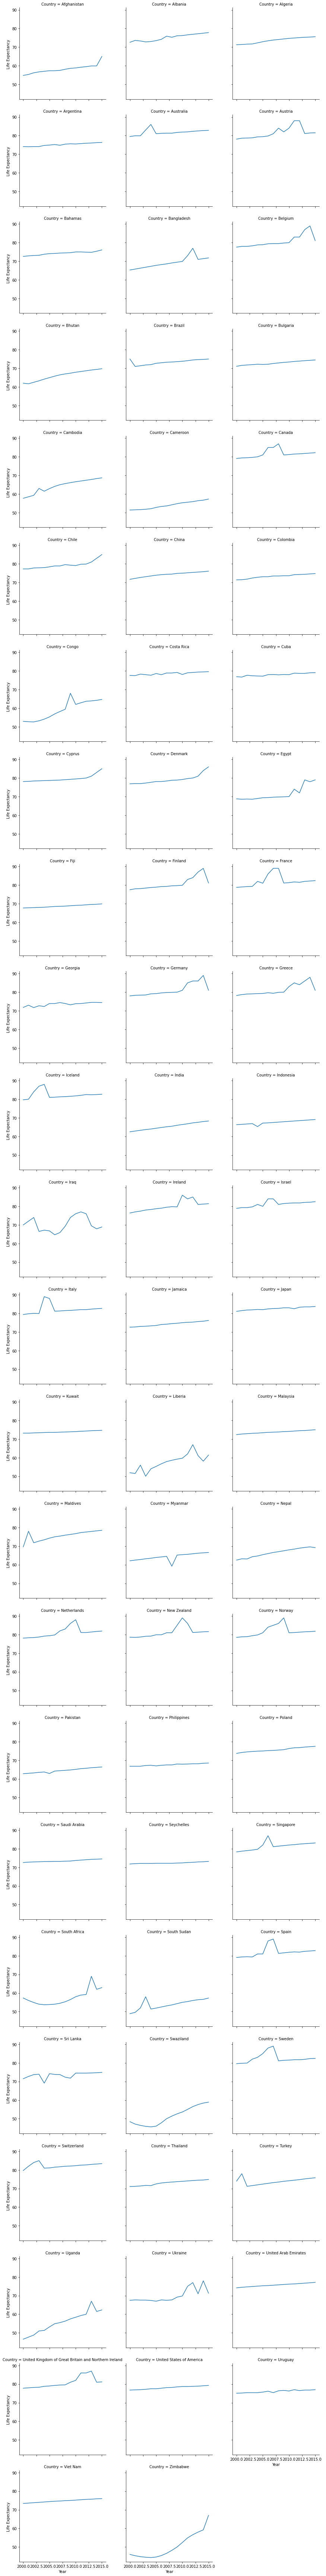

In [ ]:
g3 = sns.FacetGrid(data, col="Country", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "Life Expectancy ").add_legend())

***Barplot (Average GDP per country)***

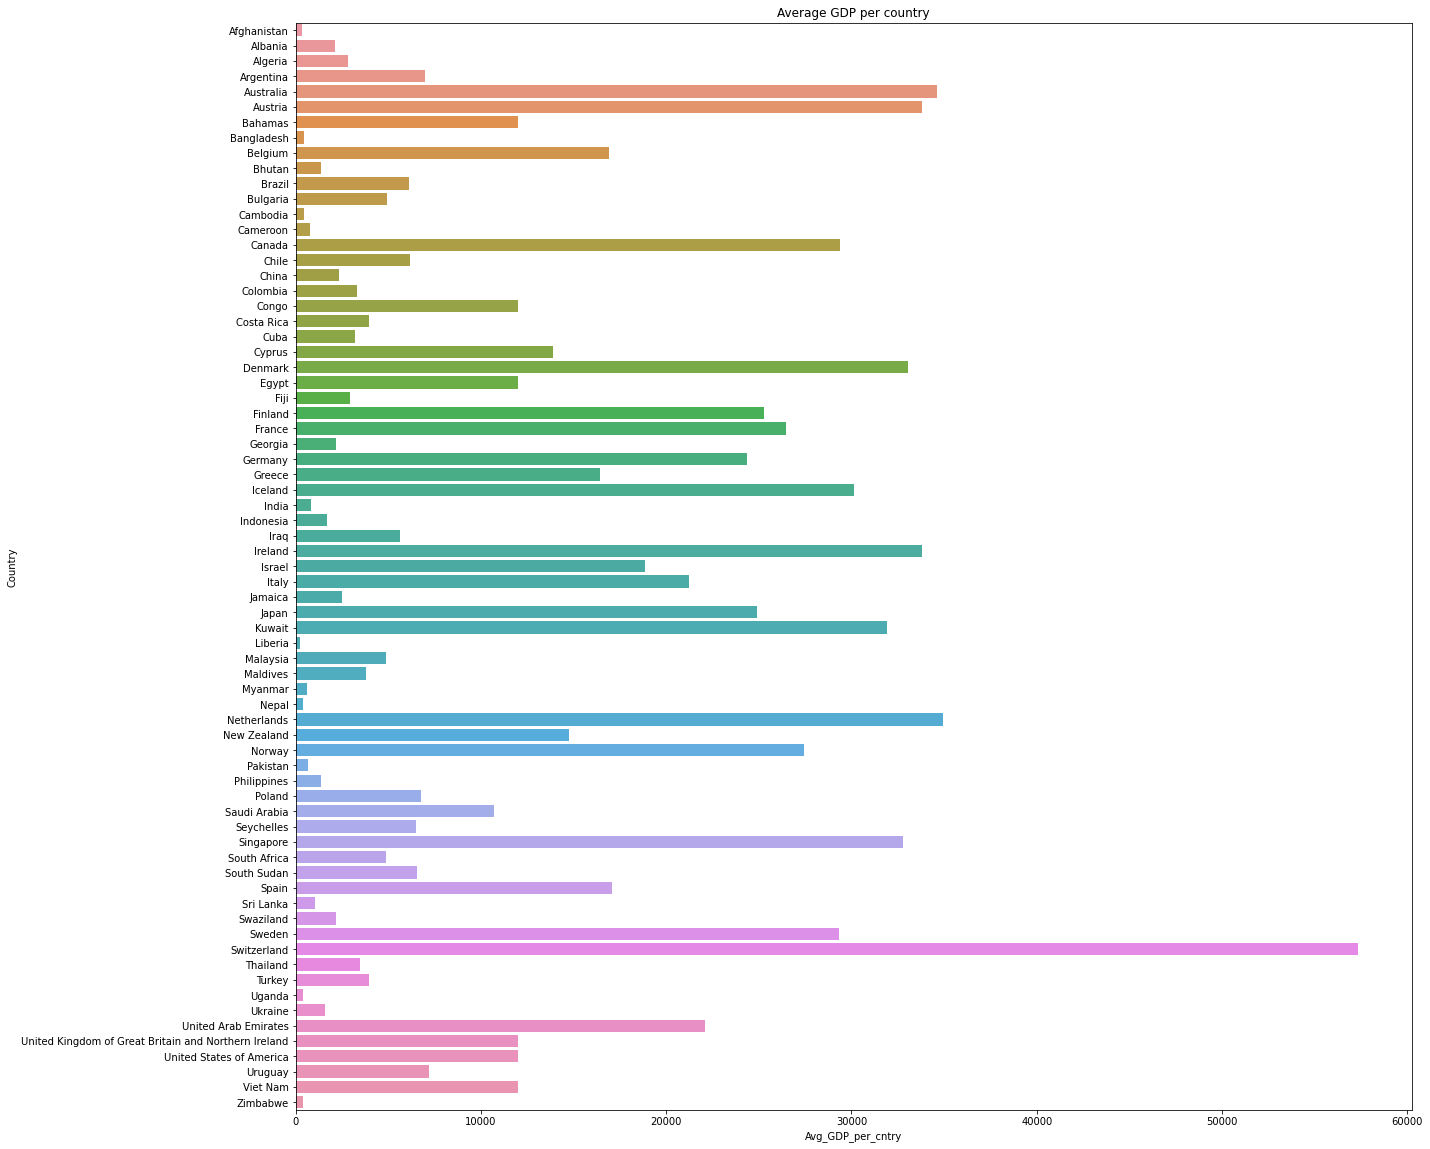

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(x=data['Avg_GDP_per_cntry'], y=data["Country"])
plt.title("Average GDP per country")
plt.show()

***Bar Chart***

In [ ]:
#Creating different datasets for developed and developing countries
#Developed Countries
developed_countries = data[data['Country Status_Developed']==1].reset_index(drop=True)
developed_countries = developed_countries.groupby('Country')['Life Expectancy '].mean().reset_index()
developed_countries.rename(columns = {'Life Expectancy ':'Avg_life_expec_developed'},inplace = True)
developed_countries.head()

,Country,Avg_life_expec_developed
0,Australia,81.81250
1,Austria,81.48125
2,Belgium,80.68125
3,Bulgaria,72.85000
4,Cyprus,79.67500


In [ ]:
mean_developed = developed_countries['Avg_life_expec_developed'].mean()
print("Average Life Expectancy of Developed Countries: ",mean_developed)

Average Life Expectancy of Developed Countries:  80.54345238095236


In [ ]:
#Developing Countries
developing_countries=data[data['Country Status_Developing']==1].reset_index(drop=True)
developing_countries = developing_countries.groupby('Country')['Life Expectancy '].mean().reset_index()
developing_countries.rename(columns = {'Life Expectancy ':'Avg_life_expec_developing'},inplace = True)
developing_countries.head()

,Country,Avg_life_expec_developing
0,Afghanistan,58.19375
1,Albania,75.15625
2,Algeria,73.61875
3,Argentina,75.15625
4,Bahamas,74.28750


In [ ]:
mean_developing = developing_countries['Avg_life_expec_developing'].mean()
print("Average Life Expectancy of Developed Countries: ", mean_developing)

Average Life Expectancy of Developed Countries:  69.995


***Bar Chart (Average Life Expectancy of Developed and Developing Countries)***

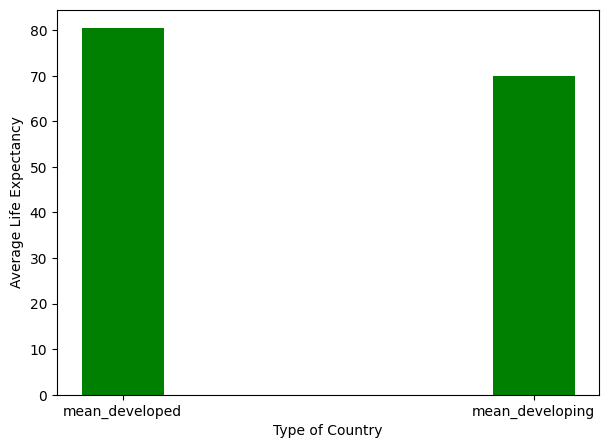

In [ ]:
plt.figure(figsize=(7,5))
labels = ('mean_developed', 'mean_developing')
values = (mean_developed, mean_developing)
plt.bar(labels, values, width=0.2, color="green")
plt.xlabel("Type of Country")
plt.ylabel("Average Life Expectancy")
plt.show()

**DETAILED ANALYSIS AND VISUALIZATION OF TWO COUNTIRES (one with maximum Life Expectancy and other with minimum Life Expectancy**

In [ ]:
#Creating a datframe containing records of country with maximum life expectancy
max_life_expec_cntry=data[data['Avg_life_exp_per_cntry']==data['Avg_life_exp_per_cntry'].max()].reset_index(drop=True)

In [ ]:
#Creating a datframe containing records of country with minimum life expectancy
min_life_expec_cntry=data[data['Avg_life_exp_per_cntry']==data['Avg_life_exp_per_cntry'].min()].reset_index(drop=True)

In [ ]:
print("Country with maximum life expectancy: ",max_life_expec_cntry['Country'].unique())

Country with maximum life expectancy:  ['Japan']


In [ ]:
print("Country with maximum life expectancy: ",min_life_expec_cntry['Country'].unique())

Country with maximum life expectancy:  ['Zimbabwe']


***ANALYSIS AND VISUALIZATION OF JAPAN (Max Life Expectancy)***

In [ ]:
max_life_expec_cntry

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,Country Status_Developed,Country Status_Developing,Avg_life_exp_per_cntry,Avg_GDP_per_cntry
0,Japan,2015,83.7,55.0,2.0,5.448106,80.942668,35.0,99.0,96.0,0.1,3.0,29.0,8.874432e+06,34474.13736,1,0,82.5375,24892.544784
1,Japan,2014,83.5,57.0,2.0,0.010000,80.942668,462.0,99.0,96.0,0.1,3.0,28.6,8.874432e+06,3896.21151,1,0,82.5375,24892.544784
2,Japan,2013,83.5,56.0,2.0,7.550000,80.942668,229.0,99.0,96.0,0.1,3.0,28.2,8.874432e+06,4454.44746,1,0,82.5375,24892.544784
3,Japan,2012,83.3,58.0,2.0,7.390000,80.942668,228.0,99.0,97.0,0.1,3.0,27.8,8.874432e+06,4863.47665,1,0,82.5375,24892.544784
4,Japan,2011,82.5,64.0,3.0,7.390000,80.942668,434.0,96.0,97.0,0.1,4.0,27.4,8.874432e+06,48167.99727,1,0,82.5375,24892.544784
5,Japan,2010,83.0,62.0,3.0,6.900000,80.942668,450.0,98.0,97.0,0.1,4.0,26.9,8.874432e+06,4457.67639,1,0,82.5375,24892.544784
6,Japan,2009,83.0,64.0,3.0,7.090000,80.942668,741.0,99.0,97.0,0.1,4.0,26.4,8.874432e+06,4855.17564,1,0,82.5375,24892.544784
7,Japan,2008,82.7,66.0,3.0,7.110000,80.942668,11015.0,98.0,98.0,0.1,4.0,25.9,8.874432e+06,39339.29757,1,0,82.5375,24892.544784
8,Japan,2007,82.6,67.0,3.0,7.290000,80.942668,0.0,97.0,98.0,0.1,4.0,25.4,8.874432e+06,35275.22843,1,0,82.5375,24892.544784
9,Japan,2006,82.4,68.0,3.0,7.490000,80.942668,520.0,95.0,98.0,0.1,4.0,24.9,8.874432e+06,35433.98896,1,0,82.5375,24892.544784


***Time Series Graph (Life Expectancy of Japan)***

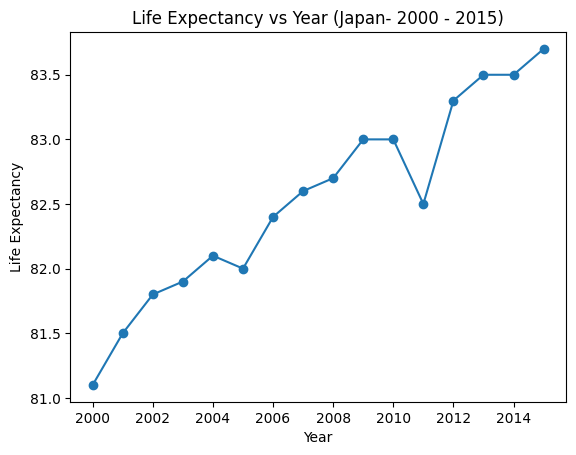

In [ ]:
plt.plot(max_life_expec_cntry['Year'], max_life_expec_cntry['Life Expectancy '], marker='o')

# Labelling
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs Year (Japan- 2000 - 2015)")

# Display
plt.show()

***Line Graph (Adult Mortality and Infant Deaths and Under-Five Deaths vs Year)***




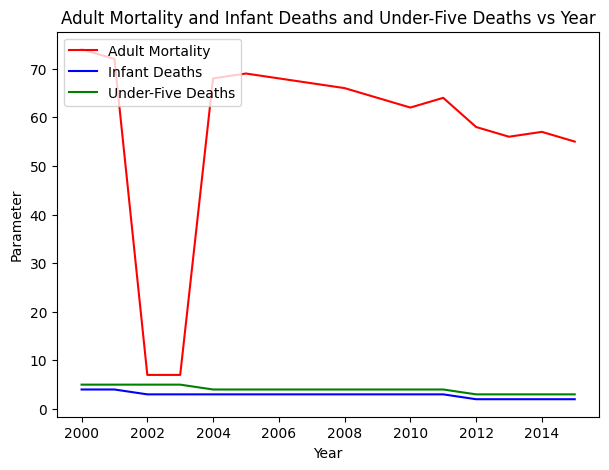

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(max_life_expec_cntry['Year'], max_life_expec_cntry["Adult Mortality"], color='red', label='Adult Mortality')
plt.plot(max_life_expec_cntry['Year'], max_life_expec_cntry["Infant Deaths"], color='blue', label='Infant Deaths')
plt.plot(max_life_expec_cntry['Year'], max_life_expec_cntry["Under-five Deaths "], color='green', label='Under-Five Deaths')
plt.xlabel("Year")
plt.ylabel("Parameter")
plt.title('Adult Mortality and Infant Deaths and Under-Five Deaths vs Year')
plt.legend(loc=2)
plt.show()

***Box Plot (Adult Mortality (Japan) )***

Text(0, 0.5, 'Parameter')

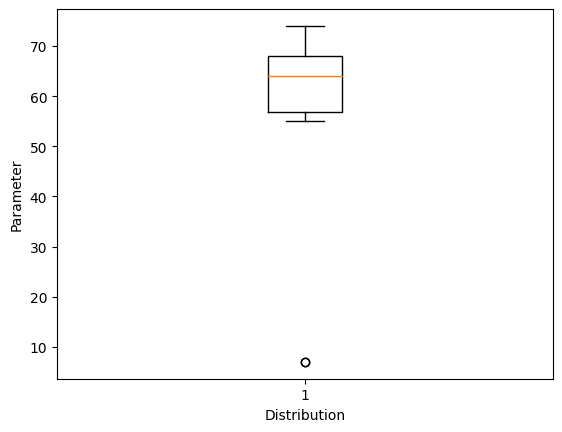

In [ ]:
#As can be seen from the above graph, the column Adult Mortality(of Japan) has outliers present in it which can be verified from the box plot below
plt.boxplot(max_life_expec_cntry["Adult Mortality"])
plt.xlabel("Distribution")
plt.ylabel("Parameter")

**Treating Outliers**

In [ ]:
q1 = max_life_expec_cntry['Adult Mortality'].quantile(0.25)
q2 = max_life_expec_cntry['Adult Mortality'].quantile(0.75)
iqr=q2-q1
upper_limit = q2 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  elif value < lower_limit:
    return lower_limit
  else:
    return value
max_life_expec_cntry['Adult Mortality'] = max_life_expec_cntry['Adult Mortality'].apply(limit_imputer)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fadfa2e4850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fadfa2e4d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fadfa2e45b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fadfa2b0310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fadfa2b05b0>],
 'means': []}

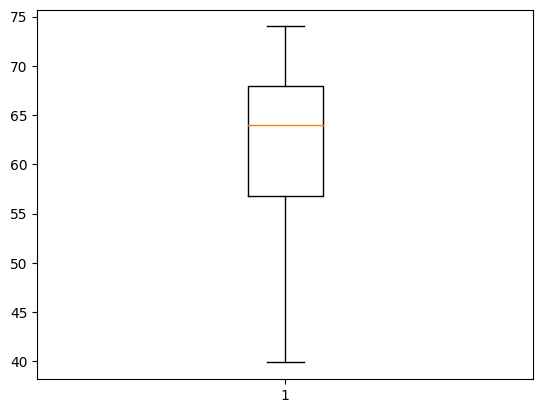

In [ ]:
#As can be seen from the box plot below, the outliers in Adult Mortality(of Japan) have been treated
plt.boxplot(max_life_expec_cntry["Adult Mortality"])

In [ ]:
max_life_expec_cntry

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,Country Status_Developed,Country Status_Developing,Avg_life_exp_per_cntry,Avg_GDP_per_cntry
0,Japan,2015,83.7,55.000,2.0,5.448106,80.942668,35.0,99.0,96.0,0.1,3.0,29.0,8.874432e+06,34474.13736,1,0,82.5375,24892.544784
1,Japan,2014,83.5,57.000,2.0,0.010000,80.942668,462.0,99.0,96.0,0.1,3.0,28.6,8.874432e+06,3896.21151,1,0,82.5375,24892.544784
2,Japan,2013,83.5,56.000,2.0,7.550000,80.942668,229.0,99.0,96.0,0.1,3.0,28.2,8.874432e+06,4454.44746,1,0,82.5375,24892.544784
3,Japan,2012,83.3,58.000,2.0,7.390000,80.942668,228.0,99.0,97.0,0.1,3.0,27.8,8.874432e+06,4863.47665,1,0,82.5375,24892.544784
4,Japan,2011,82.5,64.000,3.0,7.390000,80.942668,434.0,96.0,97.0,0.1,4.0,27.4,8.874432e+06,48167.99727,1,0,82.5375,24892.544784
5,Japan,2010,83.0,62.000,3.0,6.900000,80.942668,450.0,98.0,97.0,0.1,4.0,26.9,8.874432e+06,4457.67639,1,0,82.5375,24892.544784
6,Japan,2009,83.0,64.000,3.0,7.090000,80.942668,741.0,99.0,97.0,0.1,4.0,26.4,8.874432e+06,4855.17564,1,0,82.5375,24892.544784
7,Japan,2008,82.7,66.000,3.0,7.110000,80.942668,11015.0,98.0,98.0,0.1,4.0,25.9,8.874432e+06,39339.29757,1,0,82.5375,24892.544784
8,Japan,2007,82.6,67.000,3.0,7.290000,80.942668,0.0,97.0,98.0,0.1,4.0,25.4,8.874432e+06,35275.22843,1,0,82.5375,24892.544784
9,Japan,2006,82.4,68.000,3.0,7.490000,80.942668,520.0,95.0,98.0,0.1,4.0,24.9,8.874432e+06,35433.98896,1,0,82.5375,24892.544784


***Line Graph (Adult Mortality and Infant Deaths and Under-Five Deaths vs Year) after treating outliers***

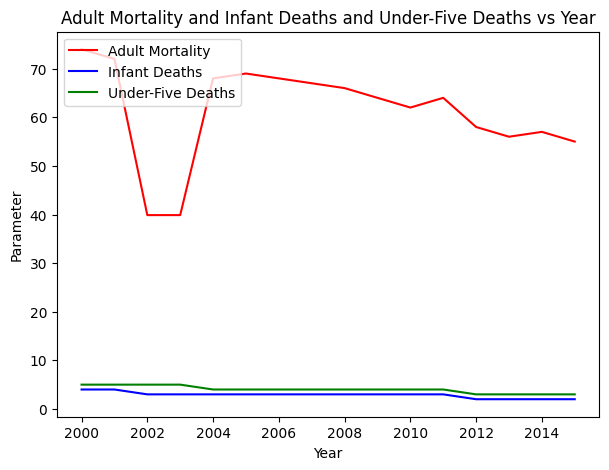

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(max_life_expec_cntry['Year'], max_life_expec_cntry["Adult Mortality"], color='red', label='Adult Mortality')
plt.plot(max_life_expec_cntry['Year'], max_life_expec_cntry["Infant Deaths"], color='blue', label='Infant Deaths')
plt.plot(max_life_expec_cntry['Year'], max_life_expec_cntry["Under-five Deaths "], color='green', label='Under-Five Deaths')
plt.xlabel("Year")
plt.ylabel("Parameter")
plt.title('Adult Mortality and Infant Deaths and Under-Five Deaths vs Year')
plt.legend(loc=2)
plt.show()

***Bar Graph (Year vs GDP)***

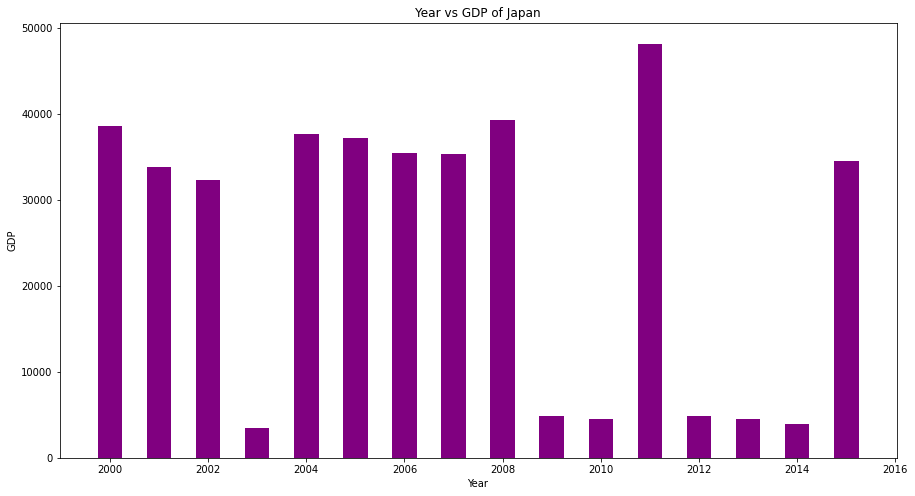

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(max_life_expec_cntry['Year'], max_life_expec_cntry['GDP'], width=0.5, color="purple")
plt.title('Year vs GDP of Japan')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

***Pie Chart (average persons suffering from various diseases in Japan)***

In [ ]:
df=max_life_expec_cntry.iloc[:,5:11]
df=pd.DataFrame(df.mean())
df

,0
Alcohol,6.941132
Hepatitis B,80.942668
Measles,6875.812500
Polio,96.000000
Diphtheria,96.250000
HIV/AIDS,0.100000


In [ ]:
#Since HIV/AIDS has very less value, it would not be properly visible in pie chart and hence is dropped
df=max_life_expec_cntry.iloc[:,5:10]
df=pd.DataFrame(df.mean())
df

,0
Alcohol,6.941132
Hepatitis B,80.942668
Measles,6875.812500
Polio,96.000000
Diphtheria,96.250000


***Pie Chart (Diseases in Japan)***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



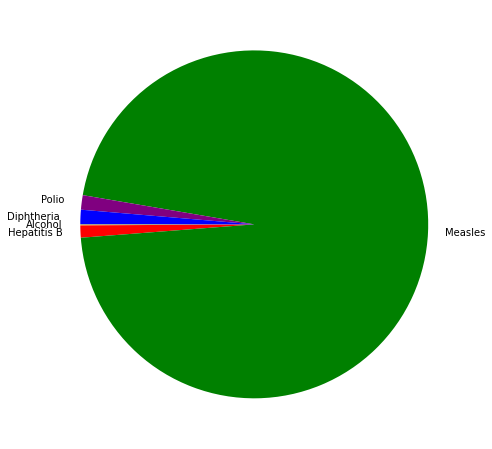

In [ ]:
plt.figure(figsize=(15,8))
labels = ('Alcohol', 'Hepatitis B', 'Measles',
      'Polio', 'Diphtheria ')
colors = ['yellow', 'red', 'green', 'purple', 'blue']
plt.pie(df , labels = labels, colors = colors, startangle=180)
plt.show()

***ANALYSIS AND VISUALIZATION OF ZIMBABWE (Min Life Expectancy)***

In [ ]:
min_life_expec_cntry

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Under-five Deaths,BMI,Population,GDP,Country Status_Developed,Country Status_Developing,Avg_life_exp_per_cntry,Avg_GDP_per_cntry
0,Zimbabwe,2015,67.0,336.0,22.0,5.448106,87.0,0.0,88.0,87.0,6.2,32.0,31.8,752263.0,118.693830,0,1,50.4875,410.980194
1,Zimbabwe,2014,59.2,371.0,23.0,6.500000,91.0,0.0,92.0,91.0,6.3,34.0,31.3,75331.0,127.474620,0,1,50.4875,410.980194
2,Zimbabwe,2013,58.0,399.0,25.0,6.390000,95.0,0.0,95.0,95.0,6.8,36.0,3.8,171161.0,111.227396,0,1,50.4875,410.980194
3,Zimbabwe,2012,56.6,429.0,26.0,6.090000,97.0,0.0,95.0,95.0,8.8,39.0,3.3,1572466.0,955.648466,0,1,50.4875,410.980194
4,Zimbabwe,2011,54.9,464.0,28.0,6.000000,94.0,0.0,93.0,93.0,13.3,42.0,29.9,1431776.0,839.927936,0,1,50.4875,410.980194
5,Zimbabwe,2010,52.4,527.0,29.0,5.210000,9.0,9696.0,89.0,89.0,15.7,44.0,29.4,128921.0,713.635620,0,1,50.4875,410.980194
6,Zimbabwe,2009,50.0,587.0,30.0,4.640000,73.0,853.0,69.0,73.0,18.1,45.0,29.0,114554.0,65.824121,0,1,50.4875,410.980194
7,Zimbabwe,2008,48.2,632.0,30.0,3.560000,75.0,0.0,75.0,75.0,20.5,46.0,28.6,9999617.0,325.678573,0,1,50.4875,410.980194
8,Zimbabwe,2007,46.6,67.0,29.0,3.880000,72.0,242.0,73.0,73.0,23.7,46.0,28.2,985287.0,396.998217,0,1,50.4875,410.980194
9,Zimbabwe,2006,45.4,7.0,28.0,4.570000,68.0,212.0,71.0,7.0,26.8,45.0,27.9,97529.0,414.796232,0,1,50.4875,410.980194


***Time Series Graph (Life Expectancy of Zimbabwe)***

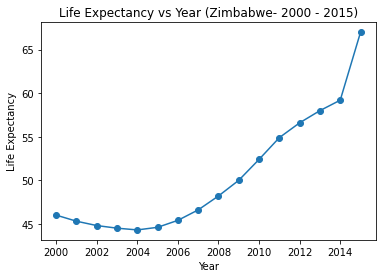

In [ ]:
plt.plot(min_life_expec_cntry['Year'], min_life_expec_cntry['Life Expectancy '], marker='o')

# Labelling
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs Year (Zimbabwe- 2000 - 2015)")

# Display
plt.show()

***Line Graph (Adult Mortality and Infant Deaths and Under-Five Deatsh vs Year)***

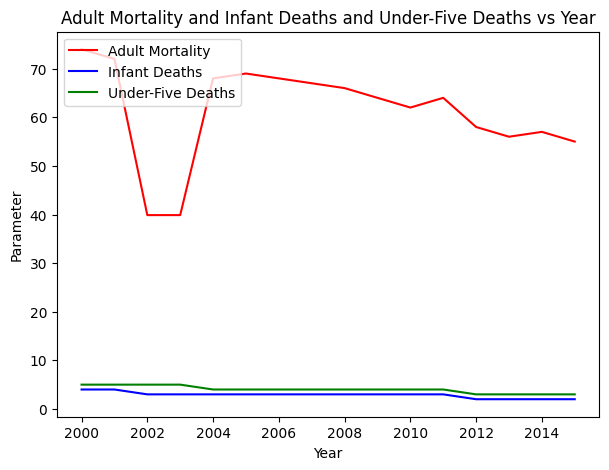

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(max_life_expec_cntry['Year'], max_life_expec_cntry["Adult Mortality"], color='red', label='Adult Mortality')
plt.plot(max_life_expec_cntry['Year'], max_life_expec_cntry["Infant Deaths"], color='blue', label='Infant Deaths')
plt.plot(max_life_expec_cntry['Year'], max_life_expec_cntry["Under-five Deaths "], color='green', label='Under-Five Deaths')
plt.xlabel("Year")
plt.ylabel("Parameter")
plt.title('Adult Mortality and Infant Deaths and Under-Five Deaths vs Year')
plt.legend(loc=2)
plt.show()

***Box Plot (Adult Mortality (Zimbabwe) )***

{'whiskers': [<matplotlib.lines.Line2D at 0x7fadfa2f8bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fadfa2f80d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fadfa2d66a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fadfa2f8460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fadfa2f89d0>],
 'means': []}

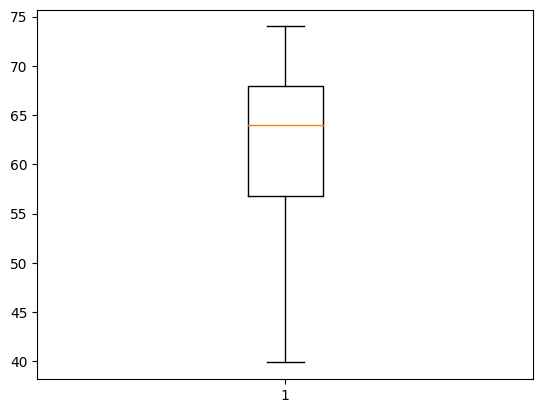

In [ ]:
#As can be seen from the above graph, no outliers are present in Adult Mortality and this can be verifiedby the following Box Plot
plt.boxplot(max_life_expec_cntry["Adult Mortality"])

***Bar Graph (Year vs GDP)***

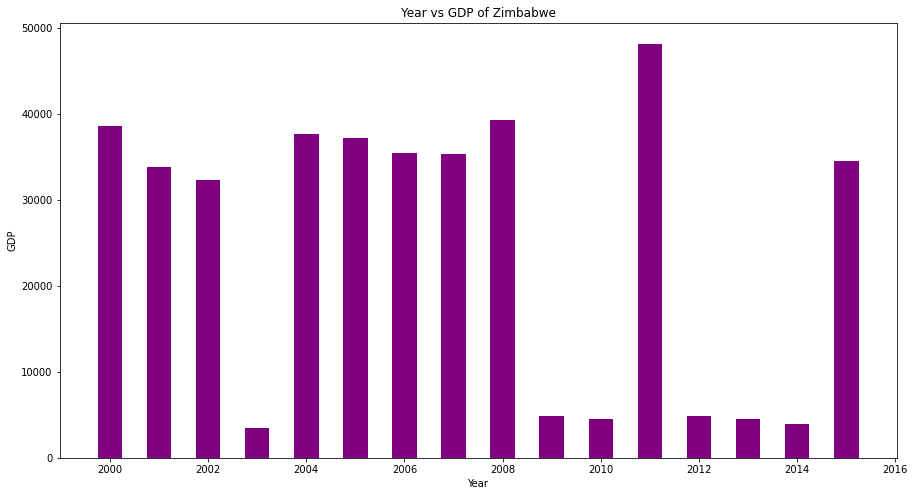

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(max_life_expec_cntry['Year'], max_life_expec_cntry['GDP'], width=0.5, color="purple")
plt.title('Year vs GDP of Zimbabwe')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

***Pie Chart (avergage persons suffering from various diseases in Zimbabwe)***

In [ ]:
df=min_life_expec_cntry.iloc[:,5:11]
df=pd.DataFrame(df.mean())
df

,0
Alcohol,4.542382
Hepatitis B,70.562500
Measles,923.000000
Polio,75.625000
Diphtheria,75.187500
HIV/AIDS,23.262500


***Pie Chart (Diseases in Zimbabwe)***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



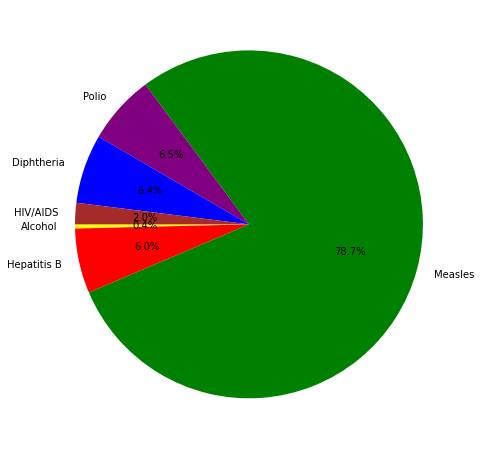

In [ ]:
plt.figure(figsize=(15,8))
labels = ('Alcohol', 'Hepatitis B', 'Measles',
      'Polio', 'Diphtheria ','HIV/AIDS')
colors = ['yellow', 'red', 'green', 'purple', 'blue', 'brown']
explode = [0,0,0.1,0,0,0]
plt.pie(df , labels = labels, colors = colors, autopct='%1.1f%%', startangle=180)
plt.show()

In [ ]:
world_total_infant_deaths = data.groupby('Year')['Infant Deaths'].sum().reset_index()
world_total_infant_deaths.head()

,Year,Infant Deaths
0,2000,4152.0
1,2001,4068.0
2,2002,3884.0
3,2003,3803.0
4,2004,3631.0


***Point Plot (Total infant deaths in the world vs Year)***



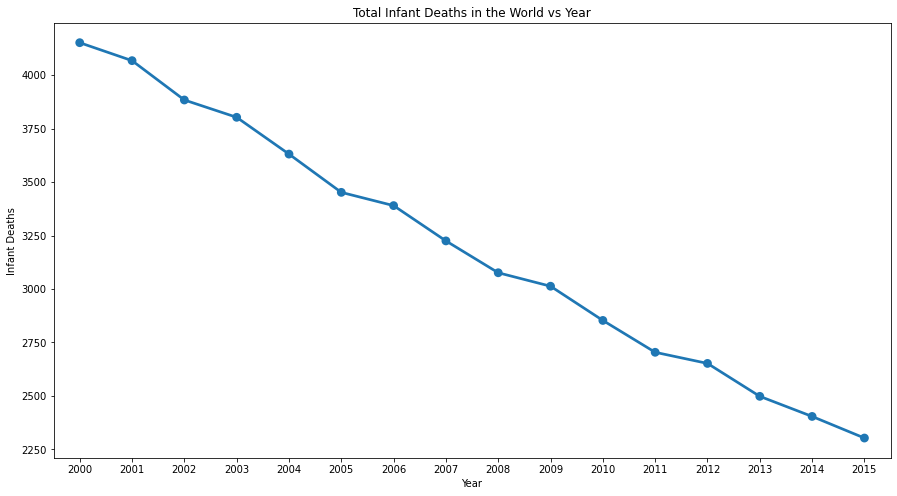

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(x=world_total_infant_deaths['Year'],y=world_total_infant_deaths['Infant Deaths'])
plt.title("Total Infant Deaths in the World vs Year")
plt.show()

In [ ]:
world_total_death_under5 = data.groupby('Year')['Under-five Deaths '].sum().reset_index()
world_total_death_under5.head()

,Year,Under-five Deaths
0,2000,5594.0
1,2001,5368.0
2,2002,5147.0
3,2003,4929.0
4,2004,4752.0


***Point Plot (Total infant deaths and Under-Five Deaths in the world vs Year)***

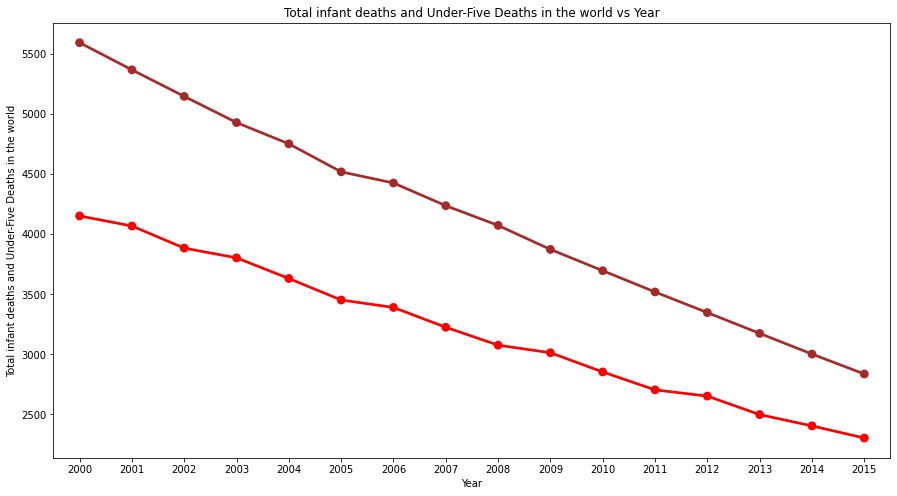

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(x=world_total_infant_deaths['Year'],y=world_total_infant_deaths['Infant Deaths'], color='red', label="Infant Deaths")
sns.pointplot(x=world_total_death_under5['Year'],y=world_total_death_under5['Under-five Deaths '],color='brown', label="Under-Five Deaths")
plt.title('Total infant deaths and Under-Five Deaths in the world vs Year')
plt.xlabel('Year')
plt.ylabel('Total infant deaths and Under-Five Deaths in the world')
plt.show()

***Histogram (Average Life Expectancy per country)***

(array([ 64.,  80.,  16., 128., 128., 288., 432.]),
 array([50.4875    , 55.06607143, 59.64464286, 64.22321429, 68.80178571,
        73.38035714, 77.95892857, 82.5375    ]),
 <a list of 7 Patch objects>)

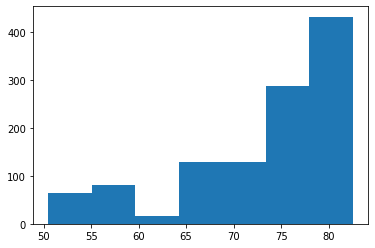

In [ ]:
plt.hist(data['Avg_life_exp_per_cntry'], bins =7)